Importing Libraries :

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sb

from sklearn.preprocessing import LabelEncoder, StandardScaler

Loading Data : 

In [3]:
product_df = pd.read_excel(r"C:\Users\naren\OneDrive\Desktop\NIIT\Project\Products.xlsx")
customer_df = pd.read_excel(r"C:\Users\naren\OneDrive\Desktop\NIIT\Project\Customer.xlsx")
geolocation_df = pd.read_excel(r"C:\Users\naren\OneDrive\Desktop\NIIT\Project\Geolocation.xlsx")
order_item_df = pd.read_excel(r"C:\Users\naren\OneDrive\Desktop\NIIT\Project\Order_items.xlsx")
order_review_df = pd.read_excel(r"C:\Users\naren\OneDrive\Desktop\NIIT\Project\Order_reviews.xlsx")
order_df = pd.read_excel(r"C:\Users\naren\OneDrive\Desktop\NIIT\Project\Orders.xlsx")

In [4]:
dataframes = {
    "customer_df" : customer_df,
    "product_df" : product_df,
    "geolocation_df" : geolocation_df,
    "order_df" : order_df,
    "order_item_df" : order_item_df,
    "order_review_df" : order_review_df
}

Data Understanding :

In [5]:
for name, item in dataframes.items():
    print(name)
    print("--" * 15)
    print(f"{item.info()} \n")


customer_df
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        90000 non-null  object
 1   customer_zip_code  90000 non-null  int64 
 2   gender             90000 non-null  object
 3   age_group          90000 non-null  object
 4   customer_segment   90000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB
None 

product_df
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   product_id          32951 non-null  object
 1   Category_name       32951 non-null  object
 2   sub_category_name   32951 non-null  object
 3   product_weight_g    32951 non-null  int64 
 4   brand               

Missing Values :

In [6]:
for name, item in dataframes.items():
    print(name)
    print("--" * 15)
    isnull = item.isna().sum()
    print(f"{isnull} \n")

customer_df
------------------------------
customer_id          0
customer_zip_code    0
gender               0
age_group            0
customer_segment     0
dtype: int64 

product_df
------------------------------
product_id            0
Category_name         0
sub_category_name     0
product_weight_g      0
brand                 0
cost_price            0
selling_price         0
stock_availability    0
dtype: int64 

geolocation_df
------------------------------
geolocation_zip_code    0
geolocation_city        1
geolocation_state       0
geolocation_lat         0
geolocation_lng         0
region                  0
dtype: int64 

order_df
------------------------------
order_id                            0
customer_id                         0
order_status                        0
payment_type                        0
order_purchase_timestamp            0
order_approved_at                5048
order_delivered_shipping_date    5048
order_delivered_customer_date    8028
order_estimated_d

In [7]:
geolocation_df["geolocation_city"] = geolocation_df["geolocation_city"].fillna(
    geolocation_df["geolocation_city"].mode()[0]
)

In [8]:
order_review_df["review_comment_message"] = order_review_df["review_comment_message"].fillna(
    "No Comment"
)

Flags :

In [9]:
order_review_df["missing_review_date"] = order_review_df["review_date"].isna().astype(int)

In [10]:
order_df["is_approved"] = order_df["order_approved_at"].notna().astype(int)
order_df["is_shipped"] = order_df['order_delivered_shipping_date'].notna().astype(int)
order_df["is_delivered"] = order_df['order_delivered_customer_date'].notna().astype(int)

Outliners : 

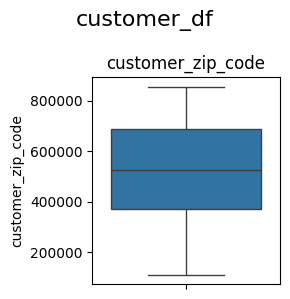

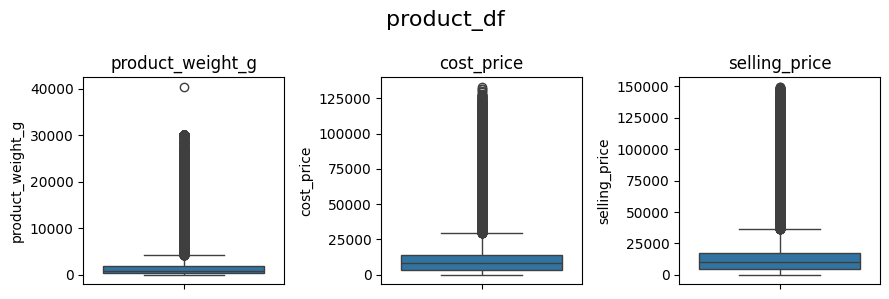

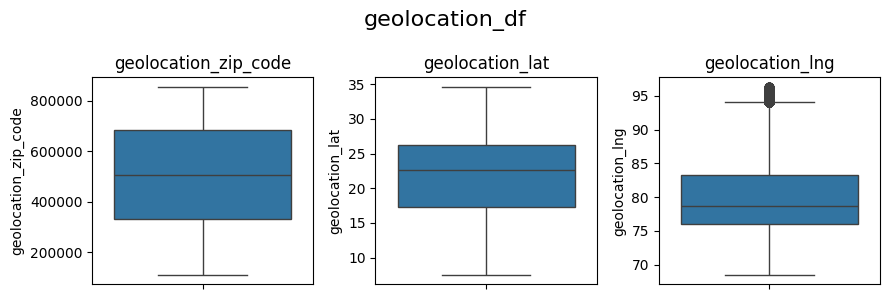

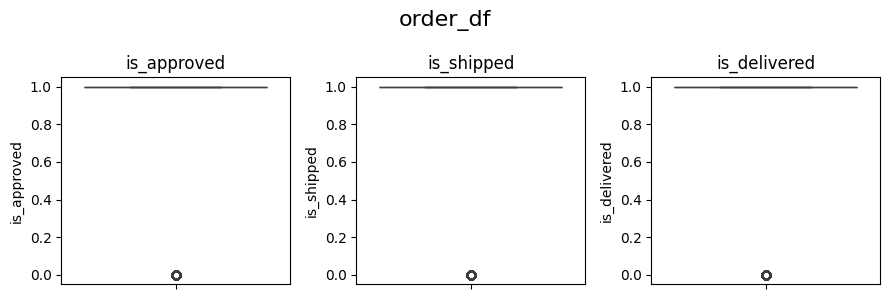

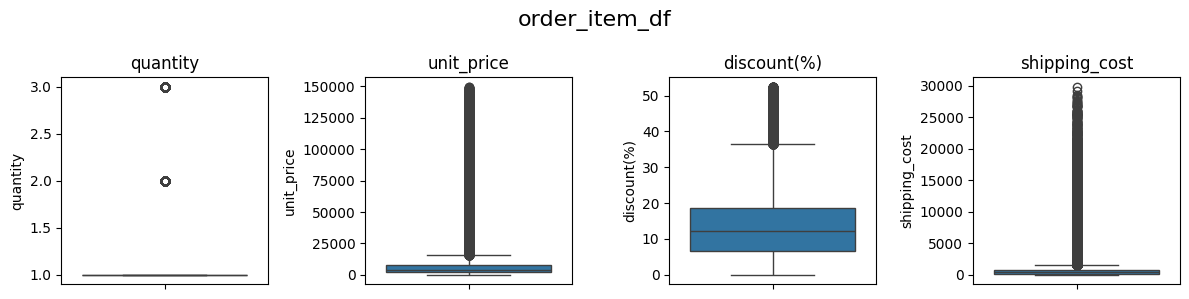

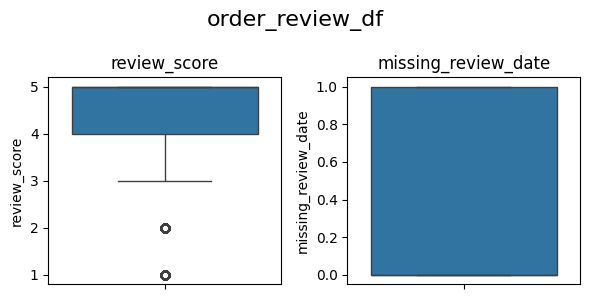

In [11]:
for name, item in dataframes.items():
    numeric_cols = item.select_dtypes(
        include= ["int64", "float64"]
    ).columns

    fig, ax = plt.subplots(1, len(numeric_cols), figsize = (3 * len(numeric_cols),3))
    ax = np.array(ax).ravel()

    for i , col in enumerate(numeric_cols):
        sb.boxplot(
            item[col],
            ax=ax[i]
        )
        ax[i].set_title(col)
        ax[i].set_xlabel("")
    plt.suptitle(name, fontsize = 16)
    plt.tight_layout()
    plt.show()
    
    

Handling Outliners :

In [12]:
outliner_product_col = [
    'product_weight_g',
    'cost_price',
    'selling_price'
]

outliner_order_item_col = [
    'unit_price',
    'discount(%)', 
    'shipping_cost'
]

In [13]:
def outliner(df, column):
    for col in column:

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[col] = df[col].clip(
            lower= lower_bound,
            upper= upper_bound
        )

In [14]:
outliner(product_df, outliner_product_col)
outliner(order_item_df, outliner_order_item_col)

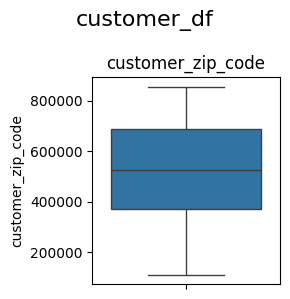

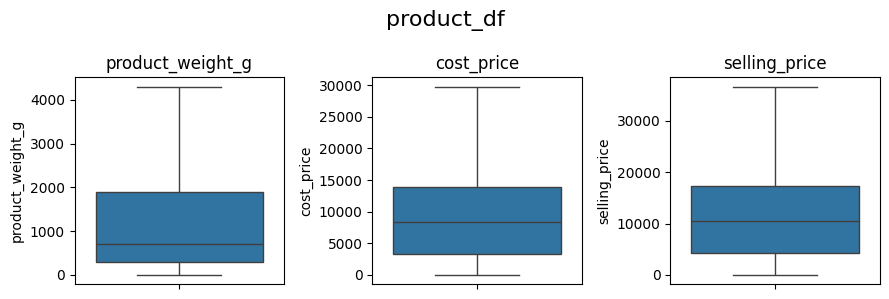

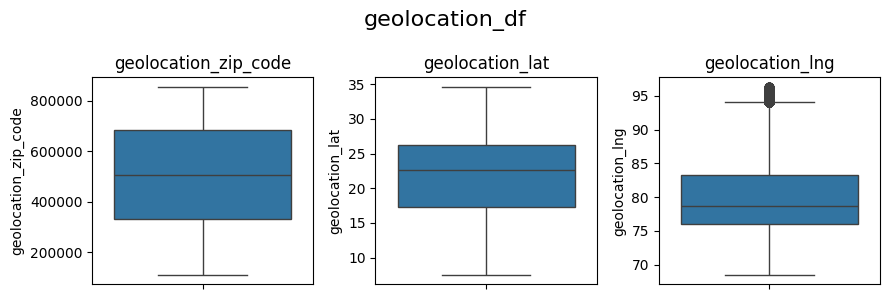

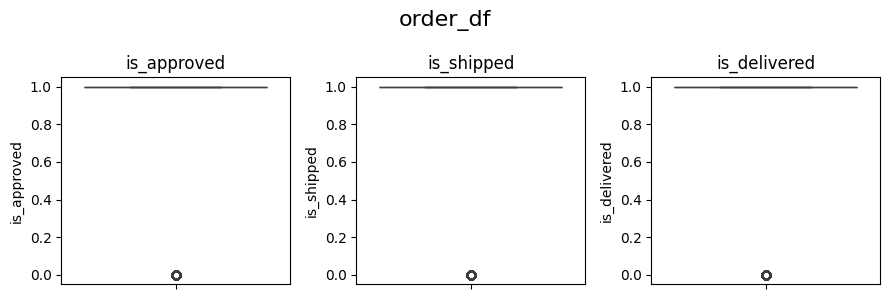

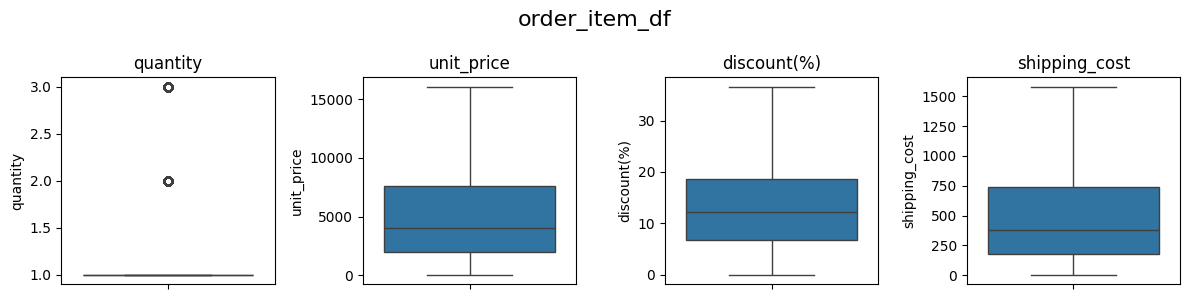

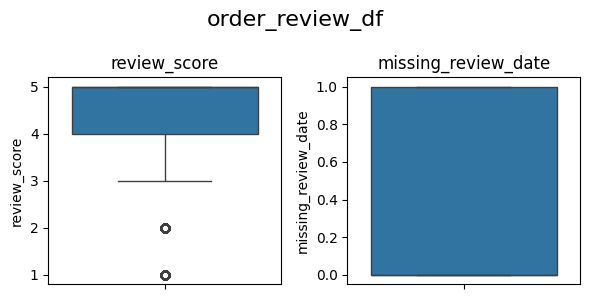

In [15]:
for name, item in dataframes.items():
    numeric_cols = item.select_dtypes(
        include= ["int64", "float64"]
    ).columns

    fig, ax = plt.subplots(1, len(numeric_cols), figsize = (3 * len(numeric_cols),3))
    ax = np.array(ax).ravel()

    for i , col in enumerate(numeric_cols):
        sb.boxplot(
            item[col],
            ax=ax[i]
        )
        ax[i].set_title(col)
        ax[i].set_xlabel("")
    plt.suptitle(name, fontsize = 16)
    plt.tight_layout()
    plt.show()
    
    

In [35]:
df = customer_df.merge(geolocation_df, how="left",left_on= 'customer_zip_code', right_on= 'geolocation_zip_code')\
.merge(order_df, how="left", on= 'customer_id')\
.merge(order_review_df,how="left",on='order_id')\
.merge(order_item_df, how="left", on= 'order_id')\
.merge(product_df, how="left", on= 'product_id')